In [29]:
import json
import pandas as pd
import numpy as np

In [25]:
docs_df = pd.read_csv('data/annotate_text.csv')

In [26]:
docs_df.head()

,row_id,text
0,607526,Chief Complaint:\n 24 Hour Events:\n PEEP ...
1,685923,The patient is a 28 year old male with a histo...
2,513639,"Gastrointestinal bleed, other (GI Bleed, GIB)\..."
3,581559,"Chief Complaint: hypotension, CHF\n I saw an..."
4,685928,Chief Complaint:\n 24 Hour Events:\n MULTI L...


In [72]:
data = json.load(open('data/MedCAT_Export_With_Text_2021-05-10_10_28_34.json'))

In [73]:
# data['projects'][0]['documents']

In [74]:
len(data['projects'][0]['documents'])

50

In [75]:
# proj['documents'][0]

In [76]:
proj = data['projects'][0]

In [77]:
annos = []

for doc in proj['documents']:
    did = doc['name']

    text = doc['text']
    for a in doc['annotations']:
        if a['validated']:
            user = a['user']
#             aid = a['id']
            aid = str(a['start']) + '-' + str(a['end'])
            value = a['value']
#                 context = text[a['start']-200:a['end']+200:]
            context = text[a['start']-200: a['start']] + ' ******Start****** ' + value + ' ******End****** ' + text[a['end']: a['end']+200]
#             print(user)
            cui = a['cui']
            correct = a['correct']
            meta_anns = a['meta_anns']
            dia = ''
            state = ''
            if len(meta_anns) != 0:
                if 'Negated' in meta_anns:
                    dia = meta_anns['Negated']['value']
                if 'Skip' in meta_anns: 
                    state = meta_anns['Skip']['value']
            annos.append([did, aid, value, context, cui, user, correct, dia, state, str(correct) + ' | ' + dia + ' | '+ state])

In [78]:
df = pd.DataFrame(annos, columns=['doc_id', 'annotation_id', 'string', 'context', 'cui', 'user', 'correct', 'Negated', 'Skip', 'combine'])

In [79]:
df.describe()

,doc_id,annotation_id,string,context,cui,user,correct,Negated,Skip,combine
count,9953,9953,9953,9953,9953,9953,9953,9953,9953,9953
unique,50,9353,3650,9950,2292,2,2,4,3,13
top,Doc 45,0-15,Assessment,******Start****** saw ******End****** and ex...,C1261322,helena,True,No,No,True | No | No
freq,569,12,89,3,95,9656,8543,8840,8901,7900


In [80]:
df['Negated'].unique()

array(['', 'No', 'Yes', 'Unknown'], dtype=object)

In [81]:
df['Skip'].unique()

array(['', 'No', 'Yes'], dtype=object)

In [99]:
df[df['user']=='tao'].describe()

,doc_id,annotation_id,string,context,cui,user,correct,Negated,Skip,combine
count,297,297,297,297,297,297,297,297,297,297
unique,11,292,172,297,158,1,2,4,3,8
top,Doc 3,20-27,Doctor,NOT DELIRIUM)\n .H/O HYPOVOLEMIA (VOLUME DEPLE...,C0439476,tao,True,No,No,True | No | No
freq,52,2,7,1,7,297,175,194,189,164


In [100]:
df['user'].unique()

array(['tao', 'helena'], dtype=object)

In [101]:
df[df['user']=='helena'].describe()

,doc_id,annotation_id,string,context,cui,user,correct,Negated,Skip,combine
count,9656,9656,9656,9656,9656,9656,9656,9656,9656,9656
unique,50,9100,3590,9654,2267,1,2,4,3,13
top,Doc 45,0-15,Assessment,******Start****** examined ******End****** t...,C1261322,helena,True,No,No,True | No | No
freq,569,12,85,2,91,9656,8368,8646,8712,7736


In [102]:
df.head()

,doc_id,annotation_id,string,context,cui,user,correct,Negated,Skip,combine
0,Doc 0,3878-3890,Differential,\n Cr\n 1.0\n 1.0\n TCO2\n 22\n 21...,C1705242,tao,False,,,False | |
1,Doc 0,4496-4507,Prophylaxis,"FAILURE, ACUTE (NOT ARDS/[**Doctor Last Name ...",C0199176,tao,True,No,No,True | No | No
2,Doc 0,2284-2294,Ventilator,...,C1611144,tao,False,,,False | |
3,Doc 0,592-601,unchanged,ed) - 1.5 mg/hour\n Fentanyl (Concentrate) -...,C2346711,tao,True,No,No,True | No | No
4,Doc 0,2871-2880,Radiology,"ot assessed), (Right DP pulse: Not assessed), ...",C0807679,tao,True,No,No,True | No | No


In [103]:
df = df[df['user']=='helena']

In [104]:
df.shape

(9656, 10)

In [105]:
df['correct'].unique()

array([ True, False])

In [106]:
df[df['correct']==False].head()

,doc_id,annotation_id,string,context,cui,user,correct,Negated,Skip,combine
92,Doc 0,2815-2823,Movement,"ht radial pulse: Not assessed), (Left radial\n...",C0026649,helena,False,,,False | |
98,Doc 0,53-59,weaned,******Start****** weaned ******End****** ove...,C0043084,helena,False,,,False | |
110,Doc 0,3908-3913,Lymph,22\n 21\n 22\n 20\n 21\n Glucose\n...,C0024202,helena,False,,,False | |
117,Doc 0,923-927,Tmax,gns\n Hemodynamic monitoring\n Fluid balan...,C0039476,helena,False,No,No,False | No | No
129,Doc 0,3840-3844,Bili,9.7\n 39.2\n 38.7\n Plt\n 74\n 81\n ...,C0520687,helena,False,,,False | |


### Here only accuracy of mention can be evaluted, as meta annotations are not measured during annotation in medcat trainer

In [107]:
df['correct'].value_counts()

True     8368
False    1288
Name: correct, dtype: int64

In [108]:
8368/9656

0.8666114333057167

## Re-annoate data

In [36]:
from medcat.cat import CAT
from medcat.utils.vocab import Vocab
from medcat.cdb import CDB
from medcat.meta_cat import MetaCAT

In [37]:
cdb = CDB()
    # cdb.load_dict("/home/ubuntu/Tao/KER/medcat_models/0.2.6.2 - snomed_us_ext_names_umls_clean_primary_1M.dat")
cdb.load_dict("medcat_models/umls_base_wlink_clean_name_400k_mimic.dat")
vocab = Vocab()
vocab.load_dict(path='medcat_models/base_vocabulary.dat')


mc_negated = MetaCAT(save_dir="medcat_models/mc_negated/")
mc_negated.load()
mc_skip = MetaCAT(save_dir="medcat_models/mc_skip/")
mc_skip.load()


cat = CAT(cdb, vocab=vocab, meta_cats=[mc_negated, mc_skip])
cat.train = False
cat.spacy_cat.MIN_ACC = 0.35
cat.spacy_cat.MIN_CONCEPT_LENGTH = 2

In [62]:
docs = {}

In [63]:
# docs_df.head()

In [64]:
# The CSV must have the following three columns: id (row id), body_analysed (text of a document) and 
#client_idcode (patient id)

print(f"Len of df: {len(docs_df)}")

batch_size = 10 # Use 10k if you have a lot of documents
batch = []
cnt = 0
for name, text in docs_df[['row_id', 'text']].values:
    text = str(text)
    cnt += 1
    if len(text) > 0 and name not in docs:
        # This will screwup positions of entites if doc>100k
        npart = int(np.ceil(len(text) / 100000))
        for i in range(npart):
            batch.append((name, text[i*100000:(i+1)*100000]))
        
        
    if len(batch) >= batch_size or (cnt == len(df) and len(batch) > 0):
        res = cat.multi_processing(batch, nproc=5, batch_size=batch_size // 100) # Use the correct number of processors

        for name, doc in res:
            if name not in docs:
                docs[name] = []
                
            docs[name].extend(doc['entities'])
#             print(name)
        batch = []

Len of df: 50


In [65]:
len(docs)

50

In [114]:
dat = []
for i, doc in enumerate(list(docs.keys())):
    doc_id = 'Doc ' + str(i)
    for ann in docs[doc]:
        negation = ann['meta_anns']['Negated']['value'] 
        skip = ann['meta_anns']['Skip']['value'] 
        cui = ann['cui']
        annotation_id = str(ann['start']) + '-' + str(ann['end'])
        text = ann['source_value']
        dat.append([doc_id, annotation_id, text, cui, negation, skip])

In [115]:
df_re = pd.DataFrame(dat, columns=['doc_id', 'annotation_id', 'string', 'cui', 'Negated', 'Skip'])

In [116]:
df_re.shape

(10147, 6)

In [117]:
df_re['doc_id'].nunique()

50

In [118]:
# df_re.head(10)

In [119]:
df_re.to_csv('data/MedCAT_unsupervised_annotation.csv', index=None)

In [120]:
df_re = pd.read_csv('data/MedCAT_unsupervised_annotation.csv')

In [121]:
df_re.head(10)

,doc_id,annotation_id,string,cui,Negated,Skip
0,Doc 0,0-15,Chief Complaint,C0277786,No,No
1,Doc 0,39-43,PEEP,C0032740,No,No
2,Doc 0,48-52,FIO2,C0428167,No,No
3,Doc 0,53-59,weaned,C0043084,No,No
4,Doc 0,60-69,overnight,C0439583,No,No
5,Doc 0,73-82,Allergies,C0020517,No,No
6,Doc 0,87-110,No Known Drug Allergies,C0262581,No,No
7,Doc 0,119-123,dose,C0178602,No,No
8,Doc 0,127-138,Antibiotics,C0003232,No,No
9,Doc 0,143-154,Ceftriaxone,C0007561,No,No


In [122]:
df.head()

,doc_id,annotation_id,string,context,cui,user,correct,Negated,Skip,combine
40,Doc 0,87-110,No Known Drug Allergies,******Start****** No Known Drug Allergies ***...,C0262581,helena,True,No,No,True | No | No
41,Doc 0,273-296,Piperacillin/Tazobactam,Allergies:\n No Known Drug Allergies\n Las...,C0250480,helena,True,No,No,True | No | No
42,Doc 0,730-752,Hemodynamic monitoring,hanges to medical and family history:\n Revi...,C4082936,helena,True,No,No,True | No | No
43,Doc 0,4162-4184,GASTROINTESTINAL BLEED,"dL, Lactic\n Acid:0.9 mmol/L, Albumin:2.8 g/...",C0017181,helena,True,No,No,True | No | No
44,Doc 0,4217-4239,GASTROINTESTINAL BLEED,"5 IU/L, Ca++:7.7 mg/dL,\n Mg++:1.3 mg/dL, PO...",C0017181,helena,True,No,No,True | No | No


In [113]:
df['correct'].unique()

array([ True, False])

In [126]:
print(df.shape, df_re.shape)

(9656, 10) (10147, 6)


In [124]:
df_com = df.merge(df_re, on=['doc_id', 'annotation_id'], how='inner')

In [125]:
df_com.shape

(7610, 14)

In [127]:
df_com.head()

,doc_id,annotation_id,string_x,context,cui_x,user,correct,Negated_x,Skip_x,combine,string_y,cui_y,Negated_y,Skip_y
0,Doc 0,87-110,No Known Drug Allergies,******Start****** No Known Drug Allergies ***...,C0262581,helena,True,No,No,True | No | No,No Known Drug Allergies,C0262581,No,No
1,Doc 0,273-296,Piperacillin/Tazobactam,Allergies:\n No Known Drug Allergies\n Las...,C0250480,helena,True,No,No,True | No | No,Piperacillin/Tazobactam,C0250480,No,No
2,Doc 0,730-752,Hemodynamic monitoring,hanges to medical and family history:\n Revi...,C4082936,helena,True,No,No,True | No | No,Hemodynamic monitoring,C4082936,No,No
3,Doc 0,4162-4184,GASTROINTESTINAL BLEED,"dL, Lactic\n Acid:0.9 mmol/L, Albumin:2.8 g/...",C0017181,helena,True,No,No,True | No | No,GASTROINTESTINAL BLEED,C0017181,No,No
4,Doc 0,4217-4239,GASTROINTESTINAL BLEED,"5 IU/L, Ca++:7.7 mg/dL,\n Mg++:1.3 mg/dL, PO...",C0017181,helena,True,No,No,True | No | No,GASTROINTESTINAL BLEED,C0017181,No,No


## Only consider correct mentions

In [128]:
df_com = df_com[df_com['correct']==True]

In [129]:
df_com.shape

(7230, 14)

In [131]:
len(df_com[df_com['Negated_x'] == df_com['Negated_y']])/len(df_com)

0.9590594744121715

In [132]:
len(df_com[df_com['Skip_x'] == df_com['Skip_y']])/len(df_com)

0.9118948824343015

In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
conm = confusion_matrix(df_com['Negated_x'], df_com['Negated_y'], labels=['No', 'Yes', 'Unknown', ''])

In [179]:
conm

array([[6749,  167,    0,    0],
       [ 110,  185,    0,    0],
       [  16,    1,    0,    0],
       [   2,    0,    0,    0]])

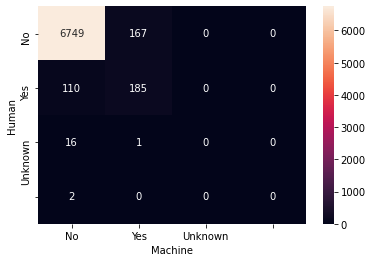

In [180]:
g = sns.heatmap(conm, annot=True, fmt="d", xticklabels=['No', 'Yes', 'Unknown', ''], yticklabels=['No', 'Yes', 'Unknown', ''])
g.set_xlabel('Machine')
g.set_ylabel('Human')
plt.show()

In [181]:
conm = confusion_matrix(df_com['Skip_x'], df_com['Skip_y'], labels=['No', 'Yes', ''], normalize=None)

In [182]:
conm

array([[6552,  436,    0],
       [ 195,   41,    0],
       [   5,    1,    0]])

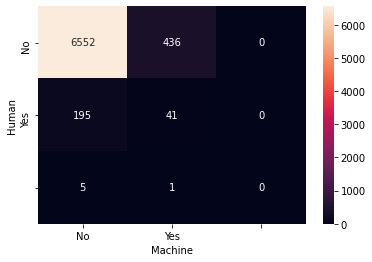

In [183]:
g = sns.heatmap(conm, annot=True, fmt="d", xticklabels=['No', 'Yes', ''], yticklabels=['No', 'Yes', ''])
g.set_xlabel('Machine')
g.set_ylabel('Human')
plt.show()